# Soccer Tweet Analysis - Portfolio Project

### Background: This is the final portfolio project for Codecademy's Data Analyst certification course. Since it was completely open-ended, I decided to conduct my analysis on one of my personal interests - soccer! 

The csv files used for the project were downloaded from Kaggle (credit to Kevlyn Kadamala for scraping Twitter data), and in this notebook, you'll find statistical analysis and visualizations of all types. I hope you enjoy reading, and as always, feel free to let me know if you have any questions or comments.

### Step 1: Load libraries.

In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2a: Load csv files.

In [357]:
arsenal_df = pd.read_csv('Arsenal.csv')
chelsea_df = pd.read_csv('ChelseaFC.csv')
mancity_df = pd.read_csv('ManCity.csv')
manutd_df = pd.read_csv('ManUtd.csv')
liverpool_df = pd.read_csv('LFC.csv')
leicester_df = pd.read_csv('LCFC.csv')

### Step 2b: Inspect new DataFrames.

In [358]:
print(leicester_df.head(5))
print(leicester_df.dtypes)

            created_at                                         full_tweet  \
0  2021-06-29 06:52:00  Happy birthday to former Fox Ali Mauchlen! 🎂 h...   
1  2021-06-28 19:07:00  2️⃣ years of @JamesJustin98 as a 🦊\n\nIs this ...   
2  2021-06-28 17:24:00  Club Historian John Hutchinson's 𝗟𝗶𝗻𝗸𝘀 𝗪𝗶𝘁𝗵 𝗧𝗵...   
3  2021-06-28 15:59:31  𝗝𝗝 ✨\n\n@JamesJustin98's rise to the top 📈➡️ h...   
4  2021-06-28 13:54:35  "Everyone knows he's a world-class goalkeeper....   

   tweet_type  retweets  likes       mentions  
0           0         7    112            NaN  
1           0        20    444  jamesjustin98  
2           0         9    169            NaN  
3           0         5    148  jamesjustin98  
4           0        19    327   kschmeichel1  
created_at    object
full_tweet    object
tweet_type     int64
retweets       int64
likes          int64
mentions      object
dtype: object


### Step 3: Summary Analysis on separate datasets. See how they compare with one another.

In [359]:
# Arsenal Summary Statistics
print("Arsenal Summary Stats: \n" + str(arsenal_df.describe()))

Arsenal Summary Stats: 
        tweet_type      retweets          likes
count  3249.000000   3249.000000    3249.000000
mean      0.265928    752.566944    8948.089566
std       0.651882   1762.487295   13026.874399
min       0.000000      0.000000       3.000000
25%       0.000000    149.000000    2349.000000
50%       0.000000    334.000000    5180.000000
75%       0.000000    782.000000   11009.000000
max       2.000000  44397.000000  229024.000000


In [360]:
# Chelsea Summary Statistics
print("Chelsea Summary Stats: \n" + str(chelsea_df.describe()))

Chelsea Summary Stats: 
        tweet_type      retweets          likes
count  3250.000000   3250.000000    3250.000000
mean      0.182154   1500.386462   13977.648615
std       0.525193   3593.610265   19658.860923
min       0.000000      0.000000       4.000000
25%       0.000000    257.000000    3677.250000
50%       0.000000    562.500000    7146.000000
75%       0.000000   1346.500000   15714.000000
max       2.000000  91662.000000  235164.000000


In [361]:
# Man City Summary Statistics
print("Man City Summary Stats: \n" + str(mancity_df.describe()))

Man City Summary Stats: 
        tweet_type      retweets          likes
count  3250.000000   3250.000000    3250.000000
mean      0.301846    344.175077    3780.801846
std       0.676040   1217.486971   10735.237716
min       0.000000      0.000000       0.000000
25%       0.000000     39.000000     608.250000
50%       0.000000     77.000000    1187.000000
75%       0.000000    183.000000    2502.750000
max       2.000000  32016.000000  197154.000000


In [362]:
# Man United Summary Statistics
print("Man United Summary Stats: \n" + str(manutd_df.describe()))

Man United Summary Stats: 
        tweet_type      retweets          likes
count  3250.000000   3250.000000    3250.000000
mean      0.126769    988.716615   10729.847692
std       0.458755   1999.979928   15944.322386
min       0.000000      1.000000       3.000000
25%       0.000000    252.000000    3229.000000
50%       0.000000    429.000000    5644.500000
75%       0.000000    970.750000   11744.500000
max       2.000000  52321.000000  281574.000000


In [363]:
# Liverpool Summary Statistics
print("Liverpool Summary Stats: \n" + str(liverpool_df.describe()))

Liverpool Summary Stats: 
        tweet_type      retweets          likes
count  3250.000000   3250.000000    3250.000000
mean      0.208615    795.272308    9452.737538
std       0.570259   1791.589020   15582.527338
min       0.000000      1.000000       6.000000
25%       0.000000    158.000000    2114.000000
50%       0.000000    324.000000    4592.000000
75%       0.000000    744.750000   11291.750000
max       2.000000  34620.000000  311247.000000


In [364]:
# Leicester Summary Statistics
print("Leicester Summary Stats: \n" + str(leicester_df.describe()))

Leicester Summary Stats: 
        tweet_type      retweets          likes
count  3250.000000   3250.000000    3250.000000
mean      0.219077    124.715692    1417.886462
std       0.558109    753.993107    6849.804311
min       0.000000      0.000000       3.000000
25%       0.000000      7.000000      98.000000
50%       0.000000     14.000000     205.000000
75%       0.000000     36.000000     610.750000
max       2.000000  18131.000000  172622.000000


### Step 4: Visualization 1 - Barplot of Average Likes per Tweet by Club.

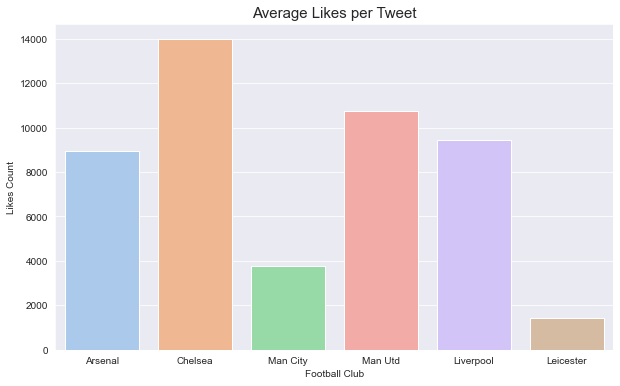

In [365]:
club_names = ["Arsenal", "Chelsea", "Man City", "Man Utd", "Liverpool", "Leicester"]
df = pd.DataFrame({
    "arsenal_likes": arsenal_df.likes, 
    "chelsea_likes": chelsea_df.likes, 
    "mancity_likes": mancity_df.likes,
    "manutd_liked": manutd_df.likes,
    "liverpool_likes": liverpool_df.likes,
    "leicester_likes": leicester_df.likes})

plt.figure(figsize=(10,6))
ax = sns.barplot(data=df, ci=None)
plt.title("Average Likes per Tweet", fontsize=15)
plt.xlabel("Football Club")
plt.ylabel("Likes Count")
ax.set_xticklabels(club_names)
plt.show()

#### This barplot is an excellent indicator of which social accounts are truly thriving. Chelsea's lead is obvious with this visualization, with an average of about 14,000 likes per tweet. Meanwhile, Leicester City, who are newcomers to the "Big Six", have less than 2,000 average likes per tweet.

### Step 5: Visualization 2 -  Barplot of like counts for each tweet type with club for hue.

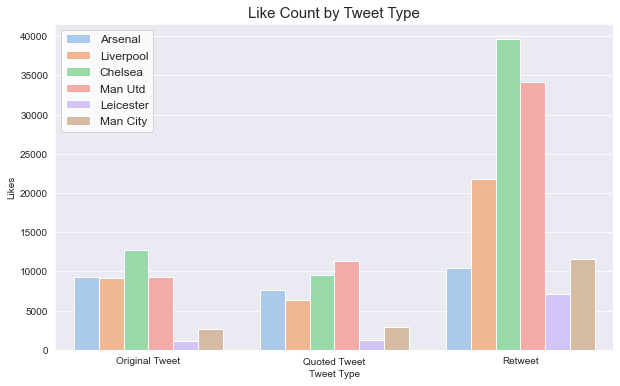

In [366]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=likes_by_club.tweet_type, y=likes_by_club.likes, hue=likes_by_club.club, ci=None)
ax.set_xticklabels(["Original Tweet", "Quoted Tweet", "Retweet"])
plt.legend(fontsize=12, facecolor='w')
plt.title("Like Count by Tweet Type", fontsize=15)
plt.xlabel("Tweet Type")
plt.ylabel("Likes")
plt.show()

#### Moving on from average counts, total likes tell us which types of tweets are more popular. It's interesting that Manchester United has more quoted tweets than Chelsea, who seems to be dominating every other category.

### Step 6: Visualization 3 - Histogram distribution of likes per club.

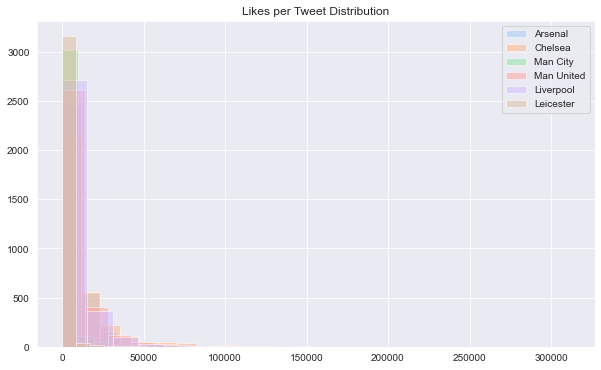

In [367]:
# Set visual styles.
sns.set_style("darkgrid")
sns.set_palette("pastel")

# Line graphs comparing clubs like distributions.
plt.figure(figsize=(10, 6))
plt.hist(arsenal_df.likes, alpha=0.5, bins=20)
plt.hist(chelsea_df.likes, alpha=0.5, bins=20)
plt.hist(mancity_df.likes, alpha=0.5, bins=20)
plt.hist(manutd_df.likes, alpha=0.5, bins=20)
plt.hist(liverpool_df.likes, alpha=0.5, bins=20)
plt.hist(leicester_df.likes, alpha=0.5, bins=20)
plt.title("Likes per Tweet Distribution")
plt.legend(["Arsenal", "Chelsea", "Man City", "Man United", "Liverpool", "Leicester"])
plt.show()

#### This is great, but the important data is relatively hard to see because of the outliers. To fix this, I made variables that contained a specified range of each df's "like" column, limiting like counts to below 6,000. I also cleared up the visuals to make it easier to read.

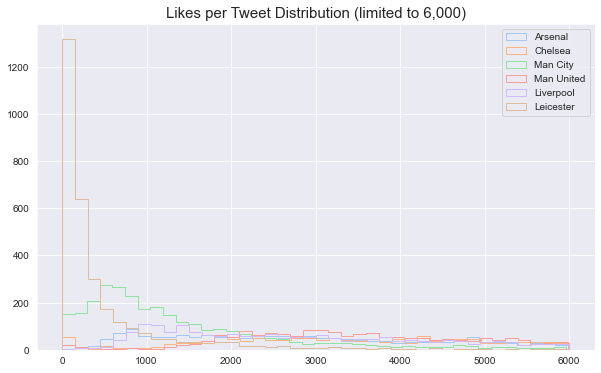

In [368]:
# Creating filtered like variables.
arsenal_likes_filtered = arsenal_df.likes[arsenal_df.likes <=6000]
chelsea_likes_filtered = chelsea_df.likes[chelsea_df.likes <=6000]
mancity_likes_filtered = mancity_df.likes[mancity_df.likes <=6000]
manutd_likes_filtered = manutd_df.likes[manutd_df.likes <=6000]
liverpool_likes_filtered = liverpool_df.likes[liverpool_df.likes <=6000]
leicester_likes_filtered = leicester_df.likes[leicester_df.likes <=6000]

# Line graphs comparing clubs' filtered likes distributions.
plt.figure(figsize=(10, 6))
plt.hist(arsenal_likes_filtered, histtype='step', bins=40)
plt.hist(chelsea_likes_filtered, histtype='step', bins=40)
plt.hist(mancity_likes_filtered, histtype='step', bins=40)
plt.hist(manutd_likes_filtered, histtype='step', bins=40)
plt.hist(liverpool_likes_filtered, histtype='step', bins=40)
plt.hist(leicester_likes_filtered, histtype='step', bins=40)
plt.title("Likes per Tweet Distribution (limited to 6,000)", fontsize=15)
plt.legend(["Arsenal", "Chelsea", "Man City", "Man United", "Liverpool", "Leicester"])
plt.show()

#### Now that the outliers are gone, we can gain a few insights from the shape of this visualization. It appears that Leicester and Man City are the clubs with the most tweets with low likes, and Chelsea seems to come out on top as the distribution continues rightward. However, this is not the most efficient way to display this data, so I'll create some violin plots to make for better comparative analysis.

### Step 7: Group csv files.

In [369]:
arsenal_df['club'] = pd.Series(["Arsenal" for x in range(len(arsenal_df.index))])
chelsea_df['club'] = pd.Series(["Chelsea" for x in range(len(chelsea_df.index))])
mancity_df['club'] = pd.Series(["Man City" for x in range(len(mancity_df.index))])
manutd_df['club'] = pd.Series(["Man Utd" for x in range(len(manutd_df.index))])
liverpool_df['club'] = pd.Series(["Liverpool" for x in range(len(liverpool_df.index))])
leicester_df['club'] = pd.Series(["Leicester" for x in range(len(leicester_df.index))])

clubs_df = pd.concat([arsenal_df, chelsea_df, mancity_df, manutd_df, liverpool_df, leicester_df])

### Step 8: Visualization 4 - Violin plot distribution of likes per club.

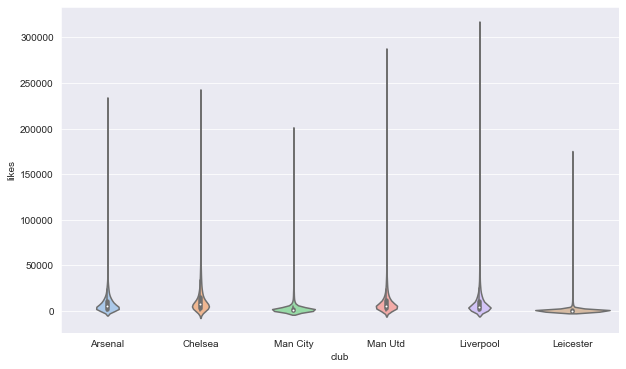

In [370]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=clubs_df.club, y=clubs_df.likes)
plt.show()

#### Again, we're running into those outliers again, so I cut off values greater than 6,000 to provide better view of the data spread.

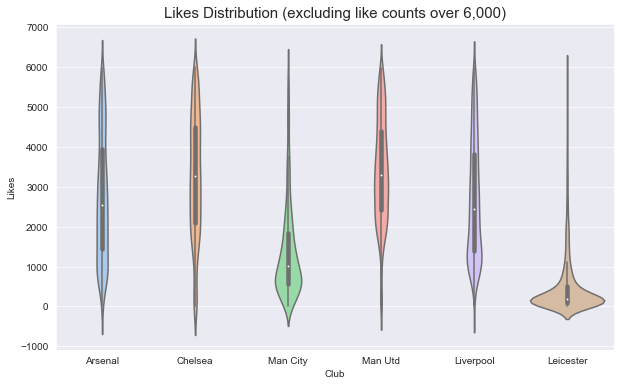

In [371]:
clubs_df_filtered = clubs_df[clubs_df.likes <= 6000]

plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.set_palette("pastel")
sns.violinplot(x=clubs_df_filtered.club, y=clubs_df_filtered.likes)
plt.title("Likes Distribution (excluding like counts over 6,000)", fontsize=15)
plt.xlabel("Club")
plt.ylabel("Likes")
plt.show()

#### Much better! Although many of the data points have been excluded for visual clarity, we can still see the trends for each club. While Man City and Leicester both have clusters around low counts, the rest of the teams seem to have a more even distribution that reaches into higher counts.

### Step 9: Visualization 5 - Lineplot of like counts per club.

In [372]:
from datetime import datetime
clubs_df["created_at"] = pd.to_datetime(clubs_df["created_at"])
clubs_df['month_year'] = clubs_df['created_at'].dt.strftime('%b %Y')
clubs_df = clubs_df.sort_values(by="created_at")
print(clubs_df.head())
print(clubs_df.dtypes)

              created_at                                         full_tweet  \
3248 2020-10-22 17:44:22                  All square in Austria. \n\n🏆 #UEL   
3247 2020-10-22 18:00:05  We're back underway in the @EuropaLeague 👊\n\n...   
3246 2020-10-22 18:05:55  Goal for Rapid Vienna - Fountas the scorer\n\n...   
3245 2020-10-22 18:15:09  The boss has made two changes... \n\n🔛 @Aubame...   
3244 2020-10-22 18:25:24  DAVID LEVELS IT UP! \n\n🇦🇹 1-1 🔵 (70) \n\n🏆 #U...   

      tweet_type  retweets  likes                                    mentions  \
3248           0       245   4455                                         NaN   
3247           0        57    804                                EuropaLeague   
3246           0       444   5638                                         NaN   
3245           0       162   2856  HectorBellerin,EddieNketiah9,OficialCedric   
3244           0       533   4679                                         NaN   

         club month_year  
3248  Arsen

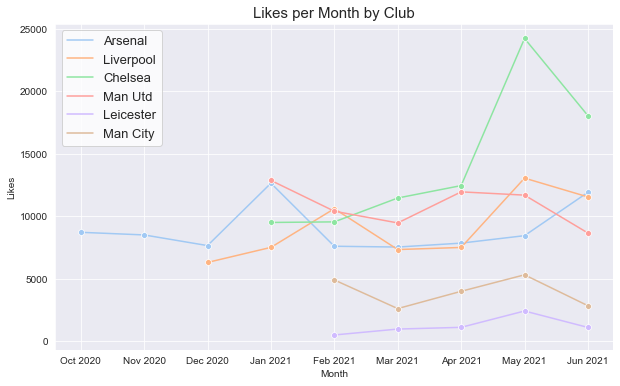

In [373]:
plt.figure(figsize=(10,6))
sns.lineplot(
    x=clubs_df.month_year, 
    y=clubs_df.likes, 
    hue=clubs_df.club,
    marker='o',
    ci=None)
plt.title("Likes per Month by Club", fontsize=15)
plt.xlabel('Month')
plt.ylabel('Likes')
plt.legend(facecolor='w', fontsize=13)
plt.show()

#### Here we can see that 3,250 tweets comes sooner for some teams than for others. It looks like Leicester and Man City have denser posting schedules than the rest of the group. Also, Chelsea enjoyed a spike in like counts for the month of May. They happened to win the Champions League Final during this time.

### Step 10: Visualization 6 - Pie plot of total likes per club (Feb - Jun 2021).

In [374]:
clubs_df = clubs_df[clubs_df.month_year >= "Feb 2021"]

likes_by_club = clubs_df[['likes', 'club', 'tweet_type']].copy()
sum_likes_by_club = likes_by_club.groupby('club').sum().sort_values(by="likes", ascending=False)
print(likes_by_club)

      likes       club  tweet_type
3248   4455    Arsenal           0
3247    804    Arsenal           0
3246   5638    Arsenal           0
3245   2856    Arsenal           0
3244   4679    Arsenal           0
...     ...        ...         ...
0     33041    Arsenal           0
1      2382    Man Utd           0
0      6055    Man Utd           0
0      2513  Liverpool           0
0       112  Leicester           0

[14945 rows x 3 columns]


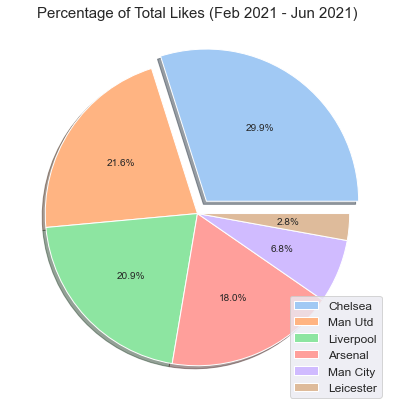

In [375]:
plt.figure(figsize=(8,7))
labels=["Chelsea", "Man Utd", "Liverpool", "Arsenal", "Man City", "Leicester"]
plt.pie(
    sum_likes_by_club.likes, 
    explode=(0.1, 0, 0, 0, 0, 0),
    shadow=True,
    autopct='%1.1f%%')
plt.title("Percentage of Total Likes (Feb 2021 - Jun 2021)", fontsize=15)
plt.legend( 
    labels,
    loc=4,
    fontsize=12)
plt.show()

#### Due to Chelsea winning its international competition, the team saw higher than usual engagement numbers, giving it the boost it needed to make it to the top of the metrics. Man Utd, Arsenal, and Liverpool have relatively the same amounts, while Man City and Leicester follow with previous trends at the back of the pack.